In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/s

In [4]:
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)

In [13]:
tf.compat.v1.disable_eager_execution()

# tf_utils 
## SetFromFlat functon

In [5]:
a = tf.Variable([0,1,2,3,4,5])
b = tf.Variable([[9,9],[9,9]])

# print(tf.reshape(a[:4], (2,2)).shape)
tf.assign(b, tf.reshape(a[:4], (2,2)))
# with tf.Session() as session:
#     session.run(op)
print(a, b)

<tf.Variable 'Variable:0' shape=(6,) dtype=int32, numpy=array([0, 1, 2, 3, 4, 5], dtype=int32)> <tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>


# MPC

In [19]:
ac_lb = np.array([-1, -1])
ac_ub = np.array([1, 1])

print(ac_lb, ac_lb.shape,type(ac_lb))

def sample_random_action_sequences(num_sequences, horizon):
# random_action_sequences = np.random.uniform(self.low, self.high, size=(num_sequences, horizon, self.ac_dim))
    return np.random.uniform(np.tile(ac_lb, [num_sequences, horizon]), np.tile(ac_ub, [num_sequences, horizon]), 
                             size=(num_sequences, horizon * ac_lb.shape[0]))

action_sequences = sample_random_action_sequences(3, 4)
print(action_sequences.shape,"\n", action_sequences)

[-1 -1] (2,) <class 'numpy.ndarray'>
(3, 8) 
 [[-0.48432877  0.45689276  0.93066677  0.97339419  0.44894295 -0.60190286
  -0.953487   -0.954485  ]
 [-0.7237733   0.1518459  -0.28964908 -0.70004172  0.72993412  0.10227487
   0.51279884  0.52881459]
 [-0.63506308 -0.46591949  0.58339787  0.99022729 -0.83958394  0.57363891
   0.09011634 -0.85950618]]


In [9]:
a = np.array([1.])
print(a.dtype)
a = a.astype(np.float32)
print(a.dtype)

float64
float32


/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys
/data/ShenShuo/.conda/envs/poplin/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be rem

Text(0.5, 0.98, 'MPE')

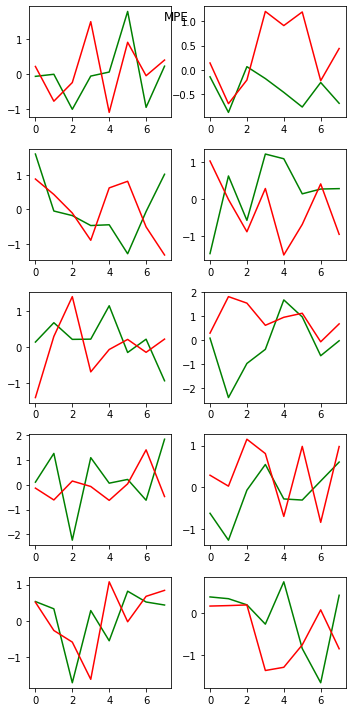

In [16]:
ob_dim = 10
pred_states = np.random.randn(80).reshape(8,10)
true_states = np.random.randn(80).reshape(8,10)
fig = plt.figure(figsize=(5,1 * ob_dim))
fig.clf()
for i in range(ob_dim):
    plt.subplot(ob_dim/2, 2, i+1)
    plt.plot(true_states[:,i], 'g')
    plt.plot(pred_states[:,i], 'r')
plt.tight_layout()
fig.suptitle('MPE')